# 8章　MNISTを使った数字認識

In [13]:
# 必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [14]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [15]:
# torch関連ライブラリのインポート

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

In [16]:
# warning表示off
import warnings
warnings.simplefilter('ignore')

# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=5)

## 8.3 ReLU関数

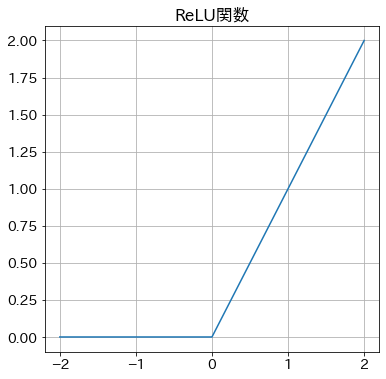

In [17]:
# ReLU関数のグラフ

relu = nn.ReLU()
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x.data, y.data)
plt.title('ReLU関数')
plt.show()

## 8.4 GPU利用

### GPUチェック

In [18]:
# デバイスの割り当て
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [19]:
torch.cuda.is_available()

True

In [20]:
# テスト用tensor変数x , y 
x_np = np.arange(-2.0, 2.1, 0.25)
y_np = np.arange(-1.0, 3.1, 0.25)
print(x_np, len(x_np))
print(y_np, len(y_np))
x = torch.tensor(x_np).float()
y = torch.tensor(y_np).float()

# xとyの間の演算
z = x * y
print(z)

print(-1.75 * -0.75)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ] 17
[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75
  2.    2.25  2.5   2.75  3.  ] 17
tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000])
1.3125


In [21]:
# 変数xをGPUに送る
x = x.to(device)

# 変数xとyの属性data, deviceの確認
print('x: ', x.device)
print('y: ', y.device)

x:  cuda:0
y:  cpu


In [22]:
# この状態でxとyの演算をすると。。。

# z = x * y

In [23]:
# yもGPUに送る
y = y.to(device)

# 今度は計算可能になる
z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000], device='cuda:0')


## 8.8 データ準備1 (データセットによる読み込み)

In [24]:
# ライブラリインポート
import torchvision.datasets as datasets

# ダウンロード先ディレクトリ名
data_root = './data'

train_set0 = datasets.MNIST(
    # 元データダウンロード先の指定
    root = data_root,  
    # 訓練データか検証データか
    train = True,  
    # 元データがない場合にダウンロードするか
    download = True)

In [25]:
# ダウンロードしたファイルの確認

!ls -lR ./data/MNIST

./data/MNIST:
total 4
drwxr-xr-x 2 dev-user dev-user 4096 Sep 19 11:56 raw

./data/MNIST/raw:
total 65008
-rw-r--r-- 1 dev-user dev-user  7840016 Sep 19 11:56 t10k-images-idx3-ubyte
-rw-r--r-- 1 dev-user dev-user  1648877 Sep 19 11:56 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 dev-user dev-user    10008 Sep 19 11:56 t10k-labels-idx1-ubyte
-rw-r--r-- 1 dev-user dev-user     4542 Sep 19 11:56 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 dev-user dev-user 47040016 Sep 19 11:56 train-images-idx3-ubyte
-rw-r--r-- 1 dev-user dev-user  9912422 Sep 19 11:56 train-images-idx3-ubyte.gz
-rw-r--r-- 1 dev-user dev-user    60008 Sep 19 11:56 train-labels-idx1-ubyte
-rw-r--r-- 1 dev-user dev-user    28881 Sep 19 11:56 train-labels-idx1-ubyte.gz


In [26]:
# データ件数の確認
print('データ件数: ', len(train_set0))

# 最初の要素の取得
image, label = train_set0[0]

# データ型の確認
print('入力データの型: ', type(image))
print('正解データの型: ', type(label))

データ件数:  60000
入力データの型:  <class 'PIL.Image.Image'>
正解データの型:  <class 'int'>


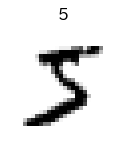

In [27]:
# 入力データの画像表示

plt.figure(figsize=(2,3))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

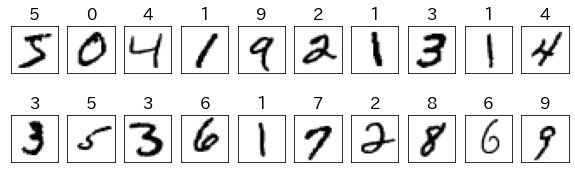

In [28]:
# 正解データ付きで、最初の20個をイメージ表示

plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)
    
    # image と labelの取得
    image, label = train_set0[i]
    
    # イメージ表示
    plt.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 8.9 データ準備2 (Transformsによるデータ前処理)

### Step1 ToTensorの利用

In [29]:
# ライブラリインポート
import torchvision.transforms as transforms

transform1 = transforms.Compose([
    # データのTensor化
    transforms.ToTensor(),
])

train_set1 = datasets.MNIST(
    root=data_root,  train=True,  download=True,
    transform = transform1)

In [30]:
# 変換結果の確認

image, label = train_set1[0]
print('入力データの型: ', type(image))
print('入力データのshape: ', image.shape)
print('最小値: ', image.data.min())
print('最大値: ', image.data.max())

入力データの型:  <class 'torch.Tensor'>
入力データのshape:  torch.Size([1, 28, 28])
最小値:  tensor(0.)
最大値:  tensor(1.)


### Step2 Normalizeの利用

In [31]:
transform2 = transforms.Compose([
    # データのTensor化
    transforms.ToTensor(),
    
    # データの正規化
    transforms.Normalize(0.5,  0.5),
])

train_set2 = datasets.MNIST(
    root = data_root,  train = True,  download = True,
    transform = transform2)

In [32]:
# 変換結果の確認

image, label = train_set2[0]
print('shape: ', image.shape)
print('最小値: ', image.data.min())
print('最大値: ', image.data.max())

shape:  torch.Size([1, 28, 28])
最小値:  tensor(-1.)
最大値:  tensor(1.)


### Step3 Lambdaを利用して1階テンソル化

In [33]:
transform3 = transforms.Compose([
    # データのTensor化
    transforms.ToTensor(),
    
    # データの正規化
    transforms.Normalize(0.5, 0.5),
    
    # Tensorの1階テンソル化
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set3 = datasets.MNIST(
    root = data_root,  train = True,  
    download=True, transform = transform3)

In [34]:
# 変換結果の確認

image, label = train_set3[0]
print('shape: ', image.shape)
print('最小値: ', image.data.min())
print('最大値: ', image.data.max())

shape:  torch.Size([784])
最小値:  tensor(-1.)
最大値:  tensor(1.)


### 最終的な実装

In [35]:
# データ変換用関数 Transforms
# (1) Imageをテンソル化
# (2) [0, 1]の範囲の値を[-1, 1]の範囲にする
# (3) データのshapeを[1, 28, 28]から[784]に変換

transform = transforms.Compose([
    # (1) データのテンソル化
    transforms.ToTensor(),
    
    # (2) データの正規化
    transforms.Normalize(0.5, 0.5),
    
    # (3) 1階テンソルに変換
    transforms.Lambda(lambda x: x.view(-1)),
])

In [36]:
# データ取得用関数 Dataset

# 訓練用データセットの定義
train_set = datasets.MNIST(
    root = data_root, train = True,
    download = True, transform = transform)

# 検証データセットの定義
test_set = datasets.MNIST(
    root = data_root, train = False, 
    download = True, transform = transform)

## 8.10 データ準備3 データローダーによるミニバッチ用データ生成)

In [37]:
# ライブラリインポート
from torch.utils.data import DataLoader

# ミニバッチのサイズ指定
batch_size = 500

# 訓練用データローダー
# 訓練用なので、シャッフルをかける
train_loader = DataLoader(
    train_set, batch_size = batch_size, 
    shuffle = True)

# 検証用データローダー
# 検証時にシャッフルは不要
test_loader = DataLoader(
    test_set,  batch_size = batch_size, 
    shuffle = False) 

In [38]:
# 何組のデータが取得できるか
print(len(train_loader))

# DataLoaderから最初の1セットを取得する
for images, labels in train_loader:
    break

print(images.shape)
print(labels.shape)

120
torch.Size([500, 784])
torch.Size([500])


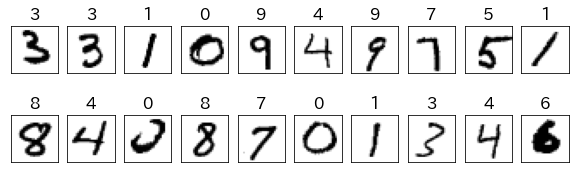

In [39]:
# イメージ表示
plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)
    
    # numpyに変換
    image = images[i].numpy()
    label = labels[i]
    
    # imgの範囲を[0, 1]に戻す
    image2 = (image + 1)/ 2
    # イメージ表示
    plt.imshow(image2.reshape(28, 28),cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

全体で60000件ある訓練データが120個のグループに分割されて取得できていることがわかります。  
今回はテスト用でシャッフルなしでデータを取得しましたが、訓練データは取得のたびにシャッフルがかかります。  
つまり、ミニバッチ用のデータセットが自動的に取得できていることになります。

## 8.11 モデル定義

In [40]:
# 入力次元数
n_input = image.shape[0]

# 出力次元数
# 分類先クラス数　今回は10になる
n_output = len(set(list(labels.data.numpy())))

#   隠れ層のノード数
n_hidden = 128

# 結果確認
print(f'n_input: {n_input}  n_hidden: {n_hidden} n_output: {n_output}')

n_input: 784  n_hidden: 128 n_output: 10


In [41]:
# モデルの定義
# 784入力10出力1隠れ層のニューラルネットワークモデル

class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # 隠れ層の定義 (隠れ層のノード数: n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 出力層の定義
        self.l2 = nn.Linear(n_hidden, n_output)

        # ReLU関数の定義
        self.relu = nn.ReLU(inplace=True)
   
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

In [42]:
torch.manual_seed(123)

In [43]:
!export CUDA_LAUNCH_BLOCKING=1

In [2]:
import torch

# デバイスの割り当て
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [45]:
# 乱数の固定化
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# モデルインスタンス生成
net = Net(n_input, n_output, n_hidden)

# モデルをGPU側に送る
net = net.to(device)

### 最適化アルゴリズムと損失関数

In [46]:
# 学習率
lr = 0.01

# アルゴリズム: 勾配降下法
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

### モデル確認

In [47]:
# モデル内のパラメータの確認
# l1.weight, l1.bias, l2.weight, l2.biasがあることがわかる

for parameter in net.named_parameters():
    print(parameter)

('l1.weight', Parameter containing:
tensor([[-0.0146,  0.0012, -0.0177,  ...,  0.0277,  0.0200,  0.0315],
        [ 0.0184, -0.0322,  0.0175,  ...,  0.0089, -0.0028, -0.0033],
        [ 0.0092,  0.0261,  0.0075,  ...,  0.0061,  0.0267, -0.0258],
        ...,
        [ 0.0235, -0.0026, -0.0129,  ...,  0.0322, -0.0059, -0.0169],
        [-0.0328, -0.0258,  0.0124,  ..., -0.0049,  0.0006,  0.0334],
        [ 0.0187, -0.0076, -0.0202,  ...,  0.0325, -0.0159, -0.0240]],
       device='cuda:0', requires_grad=True))
('l1.bias', Parameter containing:
tensor([ 0.0325, -0.0298,  0.0013,  0.0199,  0.0268, -0.0248, -0.0172, -0.0355,
         0.0122, -0.0048,  0.0214,  0.0202, -0.0243,  0.0015, -0.0276,  0.0296,
         0.0341, -0.0228,  0.0230,  0.0347, -0.0091, -0.0346,  0.0206, -0.0060,
         0.0329,  0.0047,  0.0180,  0.0101,  0.0177, -0.0309,  0.0228, -0.0224,
         0.0321,  0.0179,  0.0321,  0.0184,  0.0219, -0.0089,  0.0310, -0.0039,
        -0.0074, -0.0317,  0.0192, -0.0021,  0.0190

In [48]:
# モデルの概要表示

print(net)

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [49]:
# モデルのサマリー表示

summary(net, (784,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [10]                      --
├─Linear: 1-1                            [128]                     100,480
├─ReLU: 1-2                              [128]                     --
├─Linear: 1-3                            [10]                      1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 12.87
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.41
Estimated Total Size (MB): 0.41

## 8.12 勾配降下法

### 予測計算

In [50]:
# 訓練データセット　最初の1項目を取得
# データローダーから最初の1セットを取得する
for images, labels in train_loader:
    break 

In [51]:
# データローダーから取得したデータをGPUに送る
inputs = images.to(device)
labels = labels.to(device)

In [52]:
# 予測計算
outputs = net(inputs)

# 結果確認
print(outputs)

tensor([[-0.3623, -0.1927, -0.0179,  ...,  0.1072,  0.1025, -0.0615],
        [-0.4072, -0.1814,  0.0715,  ...,  0.1866,  0.1976,  0.1161],
        [-0.3222, -0.0547, -0.2868,  ...,  0.1967, -0.0102,  0.1592],
        ...,
        [-0.2091, -0.1058,  0.2365,  ...,  0.1360,  0.0666,  0.0987],
        [-0.2757, -0.2012,  0.1703,  ...,  0.1223,  0.2388,  0.0234],
        [-0.3045, -0.2458,  0.1415,  ...,  0.1013,  0.0821, -0.1456]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


### 損失関数

#### 損失計算と計算グラフの可視化

2.3328840732574463


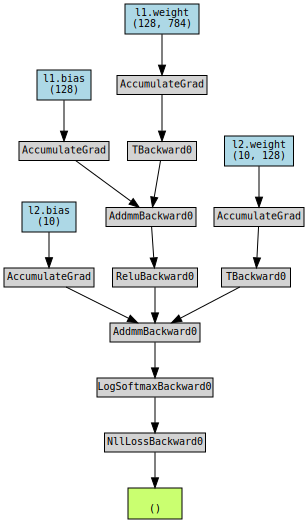

In [53]:
#  損失計算
loss = criterion(outputs, labels)

# 損失値の取得
print(loss.item())

# 損失の計算グラフ可視化
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

### 勾配計算

In [54]:
# 勾配計算の実行
loss.backward()

In [55]:
# 勾配計算の結果
w = net.to('cpu')
print(w.l1.weight.grad.numpy())
print(w.l1.bias.grad.numpy())
print(w.l2.weight.grad.numpy())
print(w.l2.bias.grad.numpy())

[[-0.00058 -0.00058 -0.00058 ... -0.00058 -0.00058 -0.00058]
 [ 0.00768  0.00768  0.00768 ...  0.00768  0.00768  0.00768]
 [-0.00179 -0.00179 -0.00179 ... -0.00179 -0.00179 -0.00179]
 ...
 [-0.00076 -0.00076 -0.00076 ... -0.00076 -0.00076 -0.00076]
 [ 0.0011   0.0011   0.0011  ...  0.0011   0.0011   0.0011 ]
 [-0.0001  -0.0001  -0.0001  ... -0.0001  -0.0001  -0.0001 ]]
[ 0.00058 -0.00768  0.00179  0.00085 -0.00004  0.00004  0.00126 -0.00085
  0.00254 -0.00164  0.00086 -0.00196  0.00059  0.00252 -0.00256  0.00081
  0.00605 -0.00108 -0.00177  0.00799  0.00627  0.00256 -0.00358  0.00563
 -0.00059 -0.00379  0.00343  0.      -0.00257 -0.00319 -0.00055  0.00345
  0.00175  0.00001  0.00007  0.00024  0.0047  -0.00124  0.00215  0.00183
  0.00371 -0.00607  0.00109  0.00972 -0.0017  -0.00124 -0.00044 -0.00102
 -0.00306 -0.00029 -0.0008   0.00041  0.00009 -0.00159 -0.00205 -0.00007
 -0.00059 -0.00235 -0.00043  0.00292  0.00128 -0.00846  0.0013   0.00154
  0.      -0.00058  0.00403 -0.00165 -0.0052

### パラメータ修正

In [56]:
# 勾配降下法の適用
optimizer.step()

In [57]:
# パラメータ値の表示
print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[-0.0146,  0.0012, -0.0177,  ...,  0.0278,  0.0200,  0.0316],
        [ 0.0183, -0.0322,  0.0174,  ...,  0.0088, -0.0029, -0.0034],
        [ 0.0092,  0.0261,  0.0075,  ...,  0.0061,  0.0267, -0.0258],
        ...,
        [ 0.0235, -0.0026, -0.0129,  ...,  0.0323, -0.0059, -0.0169],
        [-0.0329, -0.0258,  0.0124,  ..., -0.0049,  0.0006,  0.0334],
        [ 0.0187, -0.0076, -0.0202,  ...,  0.0325, -0.0159, -0.0240]],
       requires_grad=True)
Parameter containing:
tensor([ 3.2476e-02, -2.9682e-02,  1.2742e-03,  1.9874e-02,  2.6836e-02,
        -2.4759e-02, -1.7200e-02, -3.5517e-02,  1.2199e-02, -4.7449e-03,
         2.1379e-02,  2.0187e-02, -2.4297e-02,  1.4928e-03, -2.7613e-02,
         2.9617e-02,  3.4051e-02, -2.2777e-02,  2.2983e-02,  3.4580e-02,
        -9.1870e-03, -3.4619e-02,  2.0599e-02, -6.0632e-03,  3.2937e-02,
         4.7784e-03,  1.7949e-02,  1.0102e-02,  1.7700e-02, -3.0853e-02,
         2.2817e-02, -2.2391e-02,  3.2049e-02,  1.7890e-0

### 繰り返し計算

In [58]:
# 乱数の固定化
torch.manual_seed(123)
torch.cuda.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

# 学習率
lr = 0.01

# モデルインスタンス生成
net = Net(n_input, n_output, n_hidden).to(device)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 100

# 評価結果記録用
history = np.zeros((0,5))

In [59]:
# tqdmライブラリのインポート
from tqdm.notebook import tqdm

# 繰り返し計算メインループ

for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    # 訓練フェーズ
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # GPUヘ転送
        inputs = inputs.to(device)
        labels = labels.to(device)
    
        #勾配の初期化
        optimizer.zero_grad()

        # 予測計算
        outputs = net(inputs)

        # 損失計算
        loss = criterion(outputs, labels)

        # 勾配計算
        loss.backward()
    
        # パラメータ修正
        optimizer.step()

        # 予測ラベル導出
        predicted = torch.max(outputs, 1)[1]

        # 損失と精度の計算
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item() 

    #予測フェーズ
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

            
        # 予測計算
        outputs_test = net(inputs_test)

        # 損失計算
        loss_test = criterion(outputs_test, labels_test)

        #予測ラベル導出
        predicted_test = torch.max(outputs_test, 1)[1]

        # 損失と精度の計算
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum().item()

    # 評価値の算出・記録
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/100], loss: 1.82931 acc: 0.56957 val_loss: 1.32625, val_acc: 0.74640


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/100], loss: 1.03887 acc: 0.79535 val_loss: 0.79660, val_acc: 0.83180


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.70808 acc: 0.84105 val_loss: 0.60256, val_acc: 0.85850


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.57299 acc: 0.86062 val_loss: 0.51191, val_acc: 0.87140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.50222 acc: 0.87100 val_loss: 0.45826, val_acc: 0.87920


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.45883 acc: 0.87877 val_loss: 0.42421, val_acc: 0.88650


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.42938 acc: 0.88327 val_loss: 0.40076, val_acc: 0.88970


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.40813 acc: 0.88742 val_loss: 0.38285, val_acc: 0.89370


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.39176 acc: 0.89063 val_loss: 0.36857, val_acc: 0.89670


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.37875 acc: 0.89313 val_loss: 0.35741, val_acc: 0.89930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.36812 acc: 0.89592 val_loss: 0.34867, val_acc: 0.90160


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.35909 acc: 0.89787 val_loss: 0.34089, val_acc: 0.90210


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.35147 acc: 0.89978 val_loss: 0.33335, val_acc: 0.90490


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.34476 acc: 0.90132 val_loss: 0.32806, val_acc: 0.90570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.33860 acc: 0.90310 val_loss: 0.32334, val_acc: 0.90710


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.33333 acc: 0.90410 val_loss: 0.31806, val_acc: 0.90790


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.32843 acc: 0.90518 val_loss: 0.31445, val_acc: 0.90930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.32380 acc: 0.90700 val_loss: 0.31076, val_acc: 0.91090


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.31950 acc: 0.90810 val_loss: 0.30586, val_acc: 0.91190


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.31587 acc: 0.90898 val_loss: 0.30281, val_acc: 0.91230


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.31199 acc: 0.91032 val_loss: 0.29965, val_acc: 0.91520


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.30842 acc: 0.91098 val_loss: 0.29713, val_acc: 0.91430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.30507 acc: 0.91193 val_loss: 0.29433, val_acc: 0.91560


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.30190 acc: 0.91320 val_loss: 0.29123, val_acc: 0.91780


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.29883 acc: 0.91403 val_loss: 0.28884, val_acc: 0.91700


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.29597 acc: 0.91495 val_loss: 0.28646, val_acc: 0.91820


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.29311 acc: 0.91660 val_loss: 0.28365, val_acc: 0.91960


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.29026 acc: 0.91695 val_loss: 0.28186, val_acc: 0.92000


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.28765 acc: 0.91803 val_loss: 0.28043, val_acc: 0.91960


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.28510 acc: 0.91862 val_loss: 0.27748, val_acc: 0.92110


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.28233 acc: 0.91955 val_loss: 0.27486, val_acc: 0.92190


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.27988 acc: 0.92047 val_loss: 0.27256, val_acc: 0.92120


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.27762 acc: 0.92072 val_loss: 0.27011, val_acc: 0.92200


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.27513 acc: 0.92108 val_loss: 0.26898, val_acc: 0.92370


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.27277 acc: 0.92240 val_loss: 0.26669, val_acc: 0.92440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.27047 acc: 0.92278 val_loss: 0.26464, val_acc: 0.92360


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.26827 acc: 0.92355 val_loss: 0.26281, val_acc: 0.92440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.26596 acc: 0.92407 val_loss: 0.26077, val_acc: 0.92550


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.26356 acc: 0.92450 val_loss: 0.25920, val_acc: 0.92580


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.26156 acc: 0.92567 val_loss: 0.25722, val_acc: 0.92660


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.25918 acc: 0.92600 val_loss: 0.25561, val_acc: 0.92640


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.25714 acc: 0.92693 val_loss: 0.25286, val_acc: 0.92720


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.25495 acc: 0.92760 val_loss: 0.25102, val_acc: 0.92920


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.25291 acc: 0.92768 val_loss: 0.24996, val_acc: 0.92790


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.25095 acc: 0.92842 val_loss: 0.24745, val_acc: 0.92920


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.24866 acc: 0.92933 val_loss: 0.24639, val_acc: 0.93060


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.24663 acc: 0.92967 val_loss: 0.24406, val_acc: 0.93090


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.24463 acc: 0.93043 val_loss: 0.24267, val_acc: 0.93050


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.24266 acc: 0.93063 val_loss: 0.24014, val_acc: 0.93220


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.24069 acc: 0.93138 val_loss: 0.23931, val_acc: 0.93270


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.23871 acc: 0.93213 val_loss: 0.23711, val_acc: 0.93300


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.23680 acc: 0.93225 val_loss: 0.23569, val_acc: 0.93290


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.23485 acc: 0.93350 val_loss: 0.23362, val_acc: 0.93330


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [54/100], loss: 0.23294 acc: 0.93452 val_loss: 0.23177, val_acc: 0.93440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [55/100], loss: 0.23100 acc: 0.93477 val_loss: 0.22988, val_acc: 0.93450


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [56/100], loss: 0.22908 acc: 0.93518 val_loss: 0.22864, val_acc: 0.93460


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [57/100], loss: 0.22728 acc: 0.93567 val_loss: 0.22641, val_acc: 0.93580


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [58/100], loss: 0.22536 acc: 0.93647 val_loss: 0.22547, val_acc: 0.93570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [59/100], loss: 0.22366 acc: 0.93695 val_loss: 0.22321, val_acc: 0.93590


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [60/100], loss: 0.22189 acc: 0.93752 val_loss: 0.22189, val_acc: 0.93640


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [61/100], loss: 0.22017 acc: 0.93803 val_loss: 0.22010, val_acc: 0.93700


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [62/100], loss: 0.21844 acc: 0.93842 val_loss: 0.21883, val_acc: 0.93780


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [63/100], loss: 0.21652 acc: 0.93898 val_loss: 0.21654, val_acc: 0.93700


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [64/100], loss: 0.21484 acc: 0.93970 val_loss: 0.21575, val_acc: 0.93900


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [65/100], loss: 0.21320 acc: 0.94013 val_loss: 0.21332, val_acc: 0.93830


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [66/100], loss: 0.21151 acc: 0.94045 val_loss: 0.21213, val_acc: 0.93890


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [67/100], loss: 0.20995 acc: 0.94110 val_loss: 0.21140, val_acc: 0.93960


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [68/100], loss: 0.20824 acc: 0.94150 val_loss: 0.20921, val_acc: 0.93990


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [69/100], loss: 0.20672 acc: 0.94208 val_loss: 0.20713, val_acc: 0.94010


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [70/100], loss: 0.20499 acc: 0.94240 val_loss: 0.20680, val_acc: 0.93970


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [71/100], loss: 0.20352 acc: 0.94292 val_loss: 0.20482, val_acc: 0.94080


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [72/100], loss: 0.20197 acc: 0.94350 val_loss: 0.20376, val_acc: 0.94120


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [73/100], loss: 0.20052 acc: 0.94380 val_loss: 0.20208, val_acc: 0.94120


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [74/100], loss: 0.19891 acc: 0.94423 val_loss: 0.20084, val_acc: 0.94230


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [75/100], loss: 0.19753 acc: 0.94455 val_loss: 0.19892, val_acc: 0.94270


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [76/100], loss: 0.19586 acc: 0.94513 val_loss: 0.19790, val_acc: 0.94300


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [77/100], loss: 0.19453 acc: 0.94537 val_loss: 0.19668, val_acc: 0.94330


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [78/100], loss: 0.19311 acc: 0.94570 val_loss: 0.19517, val_acc: 0.94430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [79/100], loss: 0.19162 acc: 0.94623 val_loss: 0.19403, val_acc: 0.94420


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [80/100], loss: 0.19039 acc: 0.94638 val_loss: 0.19303, val_acc: 0.94360


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [81/100], loss: 0.18890 acc: 0.94717 val_loss: 0.19188, val_acc: 0.94340


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [82/100], loss: 0.18763 acc: 0.94740 val_loss: 0.19037, val_acc: 0.94460


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [83/100], loss: 0.18619 acc: 0.94797 val_loss: 0.18891, val_acc: 0.94570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [84/100], loss: 0.18486 acc: 0.94810 val_loss: 0.18785, val_acc: 0.94480


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [85/100], loss: 0.18357 acc: 0.94820 val_loss: 0.18689, val_acc: 0.94600


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [86/100], loss: 0.18228 acc: 0.94885 val_loss: 0.18556, val_acc: 0.94630


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [87/100], loss: 0.18100 acc: 0.94955 val_loss: 0.18462, val_acc: 0.94570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [88/100], loss: 0.17975 acc: 0.94977 val_loss: 0.18366, val_acc: 0.94700


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [89/100], loss: 0.17846 acc: 0.95022 val_loss: 0.18183, val_acc: 0.94680


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [90/100], loss: 0.17737 acc: 0.95040 val_loss: 0.18089, val_acc: 0.94740


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [91/100], loss: 0.17611 acc: 0.95098 val_loss: 0.17952, val_acc: 0.94800


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [92/100], loss: 0.17488 acc: 0.95117 val_loss: 0.17918, val_acc: 0.94790


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [93/100], loss: 0.17382 acc: 0.95145 val_loss: 0.17743, val_acc: 0.94810


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [94/100], loss: 0.17264 acc: 0.95170 val_loss: 0.17633, val_acc: 0.94790


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [95/100], loss: 0.17143 acc: 0.95218 val_loss: 0.17555, val_acc: 0.94900


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [96/100], loss: 0.17035 acc: 0.95275 val_loss: 0.17469, val_acc: 0.94820


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [97/100], loss: 0.16914 acc: 0.95275 val_loss: 0.17387, val_acc: 0.94830


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [98/100], loss: 0.16810 acc: 0.95328 val_loss: 0.17412, val_acc: 0.94810


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [99/100], loss: 0.16696 acc: 0.95360 val_loss: 0.17145, val_acc: 0.94840


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [100/100], loss: 0.16582 acc: 0.95405 val_loss: 0.17067, val_acc: 0.94970


## 8.13 結果確認

In [1]:
#損失と精度の確認

print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

NameError: name 'history' is not defined

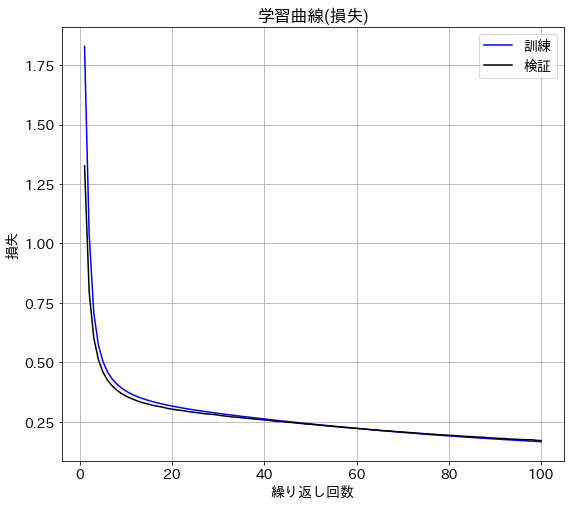

In [ ]:
# 学習曲線の表示 (損失)

plt.rcParams['figure.figsize'] = (9,8)
plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

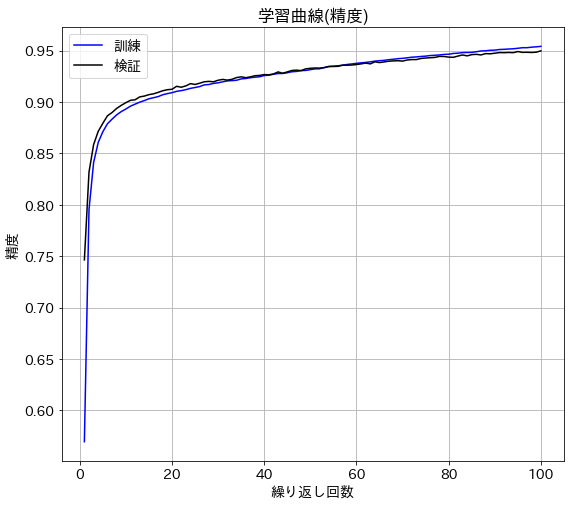

In [ ]:
# 学習曲線の表示 (精度)

plt.rcParams['figure.figsize'] = (9,8)
plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()

### イメージ表示で確認

In [ ]:
# DataLoaderから最初の1セットを取得する
for images, labels in test_loader:
    break

# 予測結果の取得
inputs = images.to(device)
labels = labels.to(device)
outputs = net(inputs)
predicted = torch.max(outputs, 1)[1]

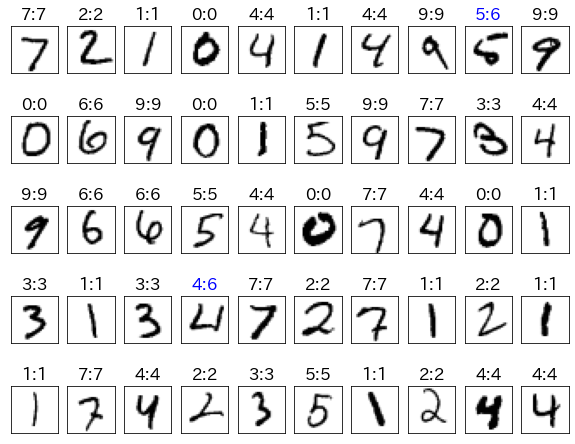

In [ ]:
# 最初の50件でイメージを「正解値:予測値」と表示

plt.figure(figsize=(10, 8))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
    
  # numpyに変換
  image = images[i]
  label = labels[i]
  pred = predicted[i]
  if (pred == label):
    c = 'k'
  else:
    c = 'b'
    
  # imgの範囲を[0, 1]に戻す
  image2 = (image + 1)/ 2
    
  # イメージ表示
  plt.imshow(image2.reshape(28, 28),cmap='gray_r')
  ax.set_title(f'{label}:{pred}', c=c)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


## 8.14 隠れ層の2層化

In [ ]:
# モデルの定義
# 784入力10出力2隠れ層のニューラルネットワークモデル

class Net2(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()
        
        # 隠れ層1の定義 (隠れ層のノード数: n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 隠れ層2の定義 (隠れ層のノード数: n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)

        # 出力層の定義
        self.l3 = nn.Linear(n_hidden, n_output)

        # ReLU関数の定義
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        x4 = self.relu(x3)
        x5 = self.l3(x4)
        return x5

In [ ]:
# 乱数の固定化
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# モデルインスタンス生成
net = Net2(n_input, n_output, n_hidden).to(device)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [ ]:
# モデルの概要表示

print(net)

Net2(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [ ]:
# モデルのサマリー表示

summary(net, (784,))

Layer (type:depth-idx)                   Output Shape              Param #
Net2                                     [10]                      --
├─Linear: 1-1                            [128]                     100,480
├─ReLU: 1-2                              [128]                     --
├─Linear: 1-3                            [128]                     16,512
├─ReLU: 1-4                              [128]                     --
├─Linear: 1-5                            [10]                      1,290
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
Total mult-adds (M): 14.99
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.47
Estimated Total Size (MB): 0.48

In [ ]:
# DataLoaderから最初の1セットを取得する
for images, labels in test_loader:
    break

# 予測結果の取得
inputs = images.to(device)
labels = labels.to(device)

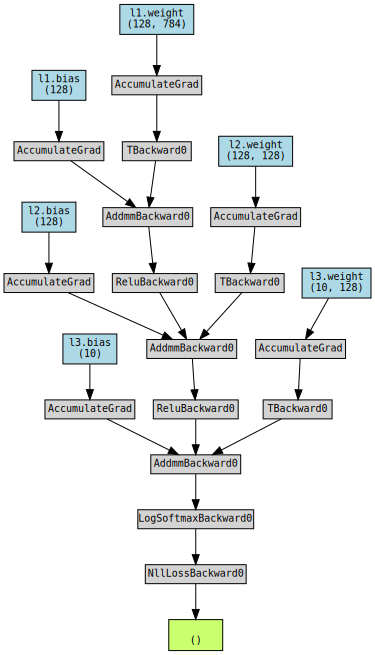

In [ ]:
# 予測計算
outputs = net(inputs)

#  損失計算
loss = criterion(outputs, labels)

# 損失の計算グラフ可視化
make_dot(loss, params=dict(net.named_parameters()))

### 勾配計算

In [ ]:
# 勾配計算
loss.backward()

# 勾配計算結果の一部
w = net.to('cpu').l1.weight.grad.numpy()
print(w)

# 各要素の絶対値の平均
print(np.abs(w).mean())

[[-0.00071 -0.00071 -0.00071 ... -0.00071 -0.00071 -0.00071]
 [-0.0001  -0.0001  -0.0001  ... -0.0001  -0.0001  -0.0001 ]
 [-0.00052 -0.00052 -0.00052 ... -0.00052 -0.00052 -0.00052]
 ...
 [ 0.00147  0.00147  0.00147 ...  0.00147  0.00147  0.00147]
 [ 0.00023  0.00023  0.00023 ...  0.00023  0.00023  0.00023]
 [ 0.00028  0.00028  0.00028 ...  0.00028  0.00028  0.00028]]
0.0008476961


### 繰り返し計算

In [ ]:
# 乱数の固定化
torch.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True


# モデルインスタンス生成
net = Net2(n_input, n_output, n_hidden).to(device)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 200

# 評価結果記録用
history2 = np.zeros((0,5))

In [ ]:
import torch

# デバイスの割り当て
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [ ]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    train_acc = 0
    train_loss = 0
    val_acc = 0
    val_loss = 0
    n_train = 0
    n_test = 0

    # 訓練フェーズ
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # GPUヘ転送
        inputs = inputs.to(device)
        labels = labels.to(device)
    
        #勾配の初期化
        optimizer.zero_grad()

        # 予測計算
        outputs = net(inputs)

        # 損失計算
        loss = criterion(outputs, labels)

        # 勾配計算
        loss.backward()
    
        # パラメータ修正
        optimizer.step()

        # 予測ラベル導出
        predicted = torch.max(outputs, 1)[1]

        # 損失と精度の計算
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item() 

    #予測フェーズ
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        # 予測計算
        outputs_test = net(inputs_test)

        # 損失計算
        loss_test = criterion(outputs_test, labels_test)

        #予測ラベル導出
        predicted_test = torch.max(outputs_test, 1)[1]

        # 損失と精度の計算
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum().item()

    # 評価値の算出・記録
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history2 = np.vstack((history2, item))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/200], loss: 2.20163 acc: 0.25380 val_loss: 2.04578, val_acc: 0.49770


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/200], loss: 1.75824 acc: 0.60425 val_loss: 1.39275, val_acc: 0.68700


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/200], loss: 1.11288 acc: 0.75657 val_loss: 0.86513, val_acc: 0.80800


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/200], loss: 0.75172 acc: 0.82288 val_loss: 0.63478, val_acc: 0.84390


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/200], loss: 0.59029 acc: 0.84985 val_loss: 0.52461, val_acc: 0.86350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/200], loss: 0.50672 acc: 0.86652 val_loss: 0.46399, val_acc: 0.87440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/200], loss: 0.45681 acc: 0.87540 val_loss: 0.42148, val_acc: 0.88560


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/200], loss: 0.42335 acc: 0.88190 val_loss: 0.39551, val_acc: 0.89020


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/200], loss: 0.39965 acc: 0.88767 val_loss: 0.37600, val_acc: 0.89350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/200], loss: 0.38195 acc: 0.89187 val_loss: 0.35886, val_acc: 0.89880


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [11/200], loss: 0.36793 acc: 0.89478 val_loss: 0.34926, val_acc: 0.90330


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [12/200], loss: 0.35633 acc: 0.89803 val_loss: 0.33760, val_acc: 0.90390


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [13/200], loss: 0.34649 acc: 0.89965 val_loss: 0.32775, val_acc: 0.90590


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [14/200], loss: 0.33814 acc: 0.90205 val_loss: 0.32063, val_acc: 0.90760


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [15/200], loss: 0.33042 acc: 0.90460 val_loss: 0.31808, val_acc: 0.90750


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [16/200], loss: 0.32382 acc: 0.90600 val_loss: 0.31015, val_acc: 0.91130


  0%|          | 0/120 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
#損失と精度の確認

print(f'初期状態: 損失: {history2[0,3]:.5f} 精度: {history2[0,4]:.5f}' )
print(f'最終状態: 損失: {history2[-1,3]:.5f} 精度: {history2[-1,4]:.5f}' )

In [ ]:
# 学習曲線の表示 (損失)
plt.plot(history2[:,0], history2[:,1], 'b', label='訓練')
plt.plot(history2[:,0], history2[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

In [ ]:
# 学習曲線の表示 (精度)

plt.plot(history2[:,0], history2[:,2], 'b', label='訓練')
plt.plot(history2[:,0], history2[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()

## コラム　勾配消失とReLU関数

In [ ]:
# モデルの定義　シグモイド関数バージョン
# 784入力10出力2隠れ層のニューラルネットワークモデル

class Net3(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()
        
        # 隠れ層1の定義 (隠れ層のノード数: n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 隠れ層2の定義 (隠れ層のノード数: n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)

        # 出力層の定義
        self.l3 = nn.Linear(n_hidden, n_output)

        # シグモイド関数の定義
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.sigmoid(x1)
        x3 = self.l2(x2)
        x4 = self.sigmoid(x3)
        x5 = self.l3(x4)
        return x5

In [ ]:
# 乱数の固定化
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# モデルインスタンス生成
net = Net3(n_input, n_output, n_hidden).to(device)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [ ]:
# DataLoaderから最初の1セットを取得する
for images, labels in test_loader:
    break

# 予測結果の取得
inputs = images.to(device)
labels = labels.to(device)

In [ ]:
# 予測計算
outputs = net(inputs)

# 損失計算
loss = criterion(outputs, labels)

# 損失の計算グラフ可視化
make_dot(loss, params=dict(net.named_parameters()))

In [ ]:
# 勾配計算
loss.backward()

# 勾配計算結果の一部
w = net.to('cpu').l1.weight.grad.numpy()
print(w)

# 各要素の絶対値の平均
print(np.abs(w).mean())

## コラム　lambda式による関数定義

In [ ]:
# 通常の関数定義

def f(x):
    return (2 * x**2 + 2)

In [ ]:
x = np.arange(-2, 2.1, 0.25)
y = f(x)
print(y)

In [ ]:
# lambda式による関数定義

g = lambda x: 2 * x**2 + 2

In [ ]:
y = g(x)
print(y)

## コラム バッチサイズと精度

### fit関数の定義

In [ ]:
# 学習用関数
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):
    base_epochs = len(history)
    for epoch in range(base_epochs, num_epochs+base_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        #訓練フェーズ
        count = 0

        for inputs, labels in tqdm(train_loader):
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 勾配の初期化
            optimizer.zero_grad()

            # 予測計算
            outputs = net(inputs)

            # 損失計算
            loss = criterion(outputs, labels)
            train_loss += loss.item()

            # 勾配計算
            loss.backward()

            # パラメータ修正
            optimizer.step()

            #予測ラベル算出
            predicted = torch.max(outputs, 1)[1]

            #正解件数算出
            train_acc += (predicted == labels).sum().item()

            # 訓練データに対する損失と精度の計算
            avg_train_loss = train_loss / count
            avg_train_acc = train_acc / count

        #予測フェーズ
        count = 0

        for inputs, labels in test_loader:
            count += len(labels)

            inputs = inputs.to(device)
            labels = labels.to(device)

            # 予測計算
            outputs = net(inputs)

            # 損失計算
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            #予測ラベル算出
            predicted = torch.max(outputs, 1)[1]

            #正解件数算出
            val_acc += (predicted == labels).sum().item()

            # 検証データに対する損失と精度の計算
            avg_val_loss = val_loss / count
            avg_val_acc = val_acc / count
    
        print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {avg_train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {avg_val_acc:.5f}')
        item = np.array([epoch+1, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc])
        history = np.vstack((history, item))
    return history

In [ ]:
# PyTorch乱数固定用

def torch_seed(seed=123):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [ ]:
# ミニバッチのサイズ指定
batch_size_train = 500

# 訓練用データローダー
# 訓練用なので、シャッフルをかける
train_loader = DataLoader(
    train_set, batch_size = batch_size_train, 
    shuffle = True)

# 乱数の固定化
torch_seed()

# 学習率
lr = 0.01

# モデルインスタンス生成
net = Net(n_input, n_output, n_hidden).to(device)

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 繰り返し回数
num_epochs = 100

# 評価結果記録用
history6 = np.zeros((0,5))

In [ ]:
history6 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history6)

### batch_size=200

In [ ]:
# ミニバッチのサイズ指定
batch_size_train = 200

# 訓練用データローダー
# 訓練用なので、シャッフルをかける
train_loader = DataLoader(
    train_set, batch_size = batch_size_train, 
    shuffle = True)

# 乱数の固定化
torch_seed()

# 学習率
lr = 0.01

# モデルインスタンス生成
net = Net(n_input, n_output, n_hidden).to(device)

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 繰り返し回数
num_epochs = 100

# 評価結果記録用
history3 = np.zeros((0,5))

In [ ]:
history3 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history3)

### batch_size=100

In [ ]:
# ミニバッチのサイズ指定
batch_size_train = 100

# 訓練用データローダー
# 訓練用なので、シャッフルをかける
train_loader = DataLoader(
    train_set, batch_size = batch_size_train, 
    shuffle = True)

# 乱数の固定化
torch_seed()

# 学習率
lr = 0.01

# モデル初期化
net = Net(n_input, n_output, n_hidden).to(device)

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 繰り返し回数
num_epochs = 100

# 評価結果記録用
history4 = np.zeros((0,5))

In [ ]:
history4 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history4)

### batch_size=50

In [ ]:
# ミニバッチのサイズ指定
batch_size_train = 50

# 訓練用データローダー
# 訓練用なので、シャッフルをかける
train_loader = DataLoader(
    train_set, batch_size = batch_size_train, 
    shuffle = True)

# 乱数の固定化
torch_seed()

# 学習率
lr = 0.01

# モデル初期化
net = Net(n_input, n_output, n_hidden).to(device)

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 繰り返し回数
num_epochs = 100

# 評価結果記録用
history5 = np.zeros((0,5))

In [ ]:
history5 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history5)

### 学習曲線の比較

In [ ]:
# 学習曲線の表示 (精度)

plt.plot(history[:,0], history[:,4], label='batch_size=500', c='k', linestyle='-.')
plt.plot(history3[:,0], history3[:,4], label='batch_size=200', c='b', linestyle='-.')
plt.plot(history4[:,0], history4[:,4], label='batch_size=100', c='k')
plt.plot(history5[:,0], history5[:,4], label='batch_size=50', c='b')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()